#### 习题9.3
- 估算两个分量的高斯混合模型的五个参数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
oblist=np.array([-67,-48,6,8,14,16,23,24,28,29,41,49,56,60,75])

In [3]:
def gaussian(sigma, y, u):
    phi = np.exp(-(y - u) ** 2 / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return phi

初始化的u_k	 [2 5]
初始化的cov_sigma [2 5]
初始化的alpha_k	 [0.231213 0.768787]
-------
第77次迭代停止


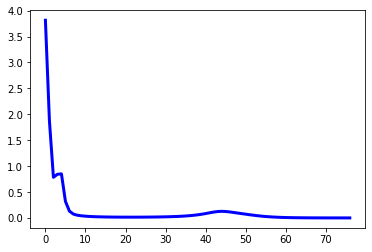

-------
u_k	 [32.80701021  6.61249503]
cov_sigm [18.90202277 46.12284609]
alpha_k	 [0.54671133 0.45328867]


In [4]:
n=len(oblist)
k=2
asadasd=0.231213
alpha=np.array([asadasd,1-asadasd])
mean_u=np.array([2,5])
cov_sigma=np.array([2,5])
yjk=np.zeros((k,n))
print("初始化的u_k\t",mean_u)
print("初始化的cov_sigma",cov_sigma)
print("初始化的alpha_k\t",alpha)      
np.seterr(divide='ignore', invalid='ignore')
lossbox=[]
print("-------")  
for num in range(300):
    # E_step
    temp=yjk.copy()
    for i in range(k):
        yjk[i,:]=gaussian(cov_sigma[i], oblist, mean_u[i])
    yjk= yjk/np.sum(yjk,axis=0)
    yjk[np.isnan(yjk)]=0.5
    
    # M_step
    cov_sigma[0]=np.sum(yjk[0,:]*(oblist-mean_u[0])**2)/np.sum(yjk[0,:])
    cov_sigma[1]=np.sum(yjk[1,:]*(oblist-mean_u[1])**2)/np.sum(yjk[1,:])
    cov_sigma=np.sqrt(cov_sigma)
    mean_u= np.sum(yjk*oblist,axis=1)/np.sum(yjk,axis=1)
    alpha= np.sum(yjk,axis=1)/n
    
    ##终止条件
    if np.linalg.norm(yjk-temp)<0.0001:
        print("第{}次迭代停止".format(num))
        break
        
    lossbox.append(np.linalg.norm(yjk-temp))
    
if True:
    bp_y = lossbox
    plt.plot(bp_y, linewidth=3, linestyle="-",color="blue")
    plt.show()
    
print("-------")  
print('u_k\t',mean_u)
print("cov_sigm",cov_sigma)
print("alpha_k\t",alpha)

#### 习题10.1
- 给定 $\lambda =(A,B,\pi)$ 用后向算法求$P(O|\lambda)$

In [13]:
A=np.array([[0.5,0.2,0.3],[0.3,0.5,0.2],[0.2,0.3,0.5]])
B=np.array([[0.5,0.5],[0.4,0.6],[0.7,0.3]])
pi=np.array([0.2,0.4,0.4])
Observe=np.array([0,1,0,1])## 红=0 ，白=1
T=4

- $A_{ij}$ : 状态i 转移到状态j 的概率,一共三个状态（三个盒子）
- $B_{ij}$： 状态i 产生观测j（红或者白）的概率
- $pi_{ij}$: 初试状态的概率分布（三个盒子）

In [39]:
"""初始化"""
temp=beta=np.full(3,fill_value=1)

"""后向"""
for i in range(T-1,0,-1):
    beta=A *B[:,Observe[i]]@beta

"""计算概率"""
P=pi * B[:,Observe[0]] @ beta

print("观测序列概率为：%0.5f" %P)

[0.46 0.51 0.43]
[0.2461 0.2312 0.2577]
[0.112462 0.121737 0.104881]
观测序列概率为：0.06009


#### 习题11.2
- 证明 $\boldsymbol\small Z(x)$=$\boldsymbol\alpha_n(x)^T$$\boldsymbol1$=$\boldsymbol1^T$$\boldsymbol\beta_1(x)$

- 等式1
$$\boldsymbol\alpha_0(y|x)=
\begin{cases}
1& \text{y=start}\\
0& \text{otherwise}
\end{cases}$$

$$
\begin{aligned} Z_{n}(x) &=\left(M_{1}(x) M_{2}(x) \cdots M_{n+1}(x)\right)_{(\text {start}, \text {stop})} \\ &=\alpha_{o}(x)^{T} M_{1}(x) M_{2}(x) \cdots M_{n}(x) \cdot 1 \\ &=\alpha_{n}(x)^{T} \cdot 1 \end{aligned}
$$

- 等式2
$$
\left(M_{n+1}(x)\right)_{i, j}=\left\{\begin{array}{ll}{1,} & {j=s t o p} \\ {0,} & {\text { otherwsie }}\end{array}\right.
$$

$$
\beta_{n+1}\left(y_{n+1} | x\right)=\left\{\begin{array}{ll}{1,} & {y_{n+1}=s t o p} \\ {0,} & {\text { otherwise }}\end{array}\right.
$$

$$
\begin{aligned} Z_{n}(x) &=\left(M_{1}(x) M_{2}(x) \cdots M_{n+1}(x)\right)_{(\text {start, }, \text { top })} \\ &=\left(M_{1}(x) M_{2}(x) \cdots M_{n}(x) \beta_{n+1}(x)\right)_{\text {start }} \\ &=\left(\beta_{1}(x)\right)_{\text {start }} \\ &=1^{T} \cdot \beta_{1}(x) \end{aligned}
$$

所以，$\boldsymbol\small Z(x)$=$\boldsymbol\alpha_n(x)^T$$\boldsymbol1$=$\boldsymbol1^T$$\boldsymbol\beta_1(x)$